In [5]:
from joblib import load, dump
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
X_train_scaled, X_test_scaled, y_train, y_test = load("../../../preprocessing/scaled_original_data.joblib")
X_train_no_outliers_scaled, X_test_no_outliers_scaled, y_train_no_outliers, _ = load("../../../preprocessing/scaled_no_outliers_data.joblib")
X_train_replaced_scaled, X_test_replaced_scaled, y_train_replaced, _ = load("../../../preprocessing/scaled_replaced_outliers_data.joblib")

In [3]:
# X_train_sample, _, y_train_sample, _ = train_test_split(X_train_scaled, y_train, 
#                                                         train_size=0.01, 
#                                                         stratify=y_train,
#                                                         random_state=42)                                                 

In [15]:
X_train_no_outliers_sample, _, y_train_no_outliers_sample, _ = train_test_split(X_train_no_outliers_scaled, y_train_no_outliers, 
                                                        train_size=0.01, 
                                                        stratify=y_train_no_outliers,
                                                        random_state=42)

In [16]:
X_train_replaced_sample, _, y_train_replaced_sample, _ = train_test_split(X_train_replaced_scaled, y_train_replaced, 
                                                        train_size=0.01, 
                                                        stratify=y_train_replaced,
                                                         random_state=42)

In [6]:
knn_params = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

In [7]:
knn_no_outliers = KNeighborsClassifier()

In [8]:
knn_no_outliers.fit(X_train_no_outliers_sample,y_train_no_outliers_sample)

KNeighborsClassifier()

In [9]:
def report(model, x, y, set):
    y_pred = model.predict(x)

    print(set)
    print("---------------------------------------------------------------------------------")
    print("Classification report:")
    print("---------------------------------------------------------------------------------")
    print(classification_report(y, y_pred))

    print("---------------------------------------------------------------------------------")
    print("Confusion matrix:")
    print("---------------------------------------------------------------------------------")
    print(confusion_matrix(y, y_pred))

In [10]:
report(knn_no_outliers,X_train_no_outliers_sample,y_train_no_outliers_sample,'Train set')

Train set
---------------------------------------------------------------------------------
Classification report:
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.76      0.70      0.73     15558
         1.0       0.77      0.82      0.79     19371

    accuracy                           0.76     34929
   macro avg       0.76      0.76      0.76     34929
weighted avg       0.76      0.76      0.76     34929

---------------------------------------------------------------------------------
Confusion matrix:
---------------------------------------------------------------------------------
[[10865  4693]
 [ 3517 15854]]


In [11]:
report(knn_no_outliers,X_test_no_outliers_scaled,y_test,'Test set')

Test set
---------------------------------------------------------------------------------
Classification report:
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.61      0.52      0.56   1551263
         1.0       0.62      0.70      0.66   1748737

    accuracy                           0.62   3300000
   macro avg       0.62      0.61      0.61   3300000
weighted avg       0.62      0.62      0.61   3300000

---------------------------------------------------------------------------------
Confusion matrix:
---------------------------------------------------------------------------------
[[ 810444  740819]
 [ 520021 1228716]]


In [13]:
knn_replaced = KNeighborsClassifier()

In [14]:
knn_replaced.fit(X_train_replaced_sample,y_train_replaced_sample)

KNeighborsClassifier()

In [15]:
report(knn_replaced,X_train_replaced_sample,y_train_replaced_sample,'Train set')

Train set
---------------------------------------------------------------------------------
Classification report:
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74     36196
         1.0       0.76      0.81      0.78     40804

    accuracy                           0.76     77000
   macro avg       0.77      0.76      0.76     77000
weighted avg       0.76      0.76      0.76     77000

---------------------------------------------------------------------------------
Confusion matrix:
---------------------------------------------------------------------------------
[[25726 10470]
 [ 7677 33127]]


In [16]:
report(knn_replaced,X_test_replaced_scaled,y_test,'Test set')

Test set
---------------------------------------------------------------------------------
Classification report:
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.62      0.56      0.59   1551263
         1.0       0.64      0.70      0.67   1748737

    accuracy                           0.63   3300000
   macro avg       0.63      0.63      0.63   3300000
weighted avg       0.63      0.63      0.63   3300000

---------------------------------------------------------------------------------
Confusion matrix:
---------------------------------------------------------------------------------
[[ 871538  679725]
 [ 530914 1217823]]


In [22]:
knn_grid_no_outliers = GridSearchCV(KNeighborsClassifier(), knn_params, cv=3, scoring='accuracy', n_jobs=-1,verbose=4)
knn_grid_no_outliers.fit(X_train_no_outliers_sample, y_train_no_outliers_sample)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=4)

In [23]:
knn_grid_no_outliers.best_estimator_

KNeighborsClassifier(n_neighbors=7, p=1, weights='distance')

In [24]:
knn_grid_no_outliers.best_score_

0.6509490681095937

In [25]:
report(knn_grid_no_outliers.best_estimator_,X_train_no_outliers_sample,y_train_no_outliers_sample,'Train set')

Train set
---------------------------------------------------------------------------------
Classification report:
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     15558
         1.0       1.00      1.00      1.00     19371

    accuracy                           1.00     34929
   macro avg       1.00      1.00      1.00     34929
weighted avg       1.00      1.00      1.00     34929

---------------------------------------------------------------------------------
Confusion matrix:
---------------------------------------------------------------------------------
[[15558     0]
 [    0 19371]]


In [26]:
report(knn_grid_no_outliers.best_estimator_,X_test_no_outliers_scaled,y_test,'Test set')

Test set
---------------------------------------------------------------------------------
Classification report:
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.64      0.54      0.59   1551263
         1.0       0.64      0.73      0.68   1748737

    accuracy                           0.64   3300000
   macro avg       0.64      0.63      0.63   3300000
weighted avg       0.64      0.64      0.64   3300000

---------------------------------------------------------------------------------
Confusion matrix:
---------------------------------------------------------------------------------
[[ 842954  708309]
 [ 478460 1270277]]


In [28]:
knn_grid_replaced = GridSearchCV(KNeighborsClassifier(), knn_params, cv=3, scoring='accuracy', n_jobs=-1,verbose=4)
knn_grid_replaced.fit(X_train_replaced_sample, y_train_replaced_sample)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=4)

In [29]:
knn_grid_replaced.best_estimator_

KNeighborsClassifier(n_neighbors=7, p=1, weights='distance')

In [30]:
knn_grid_replaced.best_score_

0.6481818231230805

In [31]:
report(knn_grid_replaced.best_estimator_,X_train_replaced_sample,y_train_replaced_sample,'Train set')

Train set
---------------------------------------------------------------------------------
Classification report:
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     36196
         1.0       1.00      1.00      1.00     40804

    accuracy                           1.00     77000
   macro avg       1.00      1.00      1.00     77000
weighted avg       1.00      1.00      1.00     77000

---------------------------------------------------------------------------------
Confusion matrix:
---------------------------------------------------------------------------------
[[36196     0]
 [    0 40804]]


In [32]:
report(knn_grid_replaced.best_estimator_,X_test_replaced_scaled,y_test,'Test set')

Test set
---------------------------------------------------------------------------------
Classification report:
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.65      0.58      0.61   1551263
         1.0       0.66      0.72      0.69   1748737

    accuracy                           0.65   3300000
   macro avg       0.65      0.65      0.65   3300000
weighted avg       0.65      0.65      0.65   3300000

---------------------------------------------------------------------------------
Confusion matrix:
---------------------------------------------------------------------------------
[[ 896265  654998]
 [ 483690 1265047]]


In [33]:
knn_no_outliers_sam = knn_no_outliers
knn_replaced_sam = knn_replaced
knn_grid_no_outliers_sam = knn_grid_no_outliers.best_estimator_
knn_grid_replaced_sam = knn_grid_replaced.best_estimator_

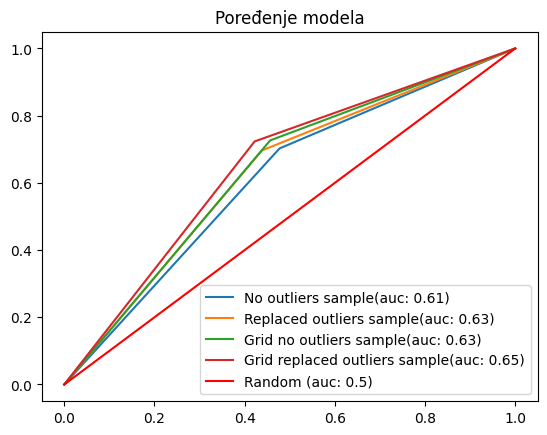

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score
models = [knn_no_outliers_sam, knn_replaced_sam,knn_grid_no_outliers_sam,knn_grid_replaced_sam]
model_names = ['No outliers sample', 'Replaced outliers sample', 'Grid no outliers sample', 'Grid replaced outliers sample']
for model, model_name,X_test in zip(models, model_names,[X_test_no_outliers_scaled,X_test_replaced_scaled,X_test_no_outliers_scaled,X_test_replaced_scaled]):
    y_pred = model.predict(X_test)
    fpr,tpr, _ = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    lab = model_name + "(auc: " + str(round(auc, 2)) + ")"
    plt.plot(fpr, tpr, label=lab)

plt.plot([0, 1], [0, 1], label='Random (auc: 0.5)', color='red')
plt.title("Poređenje modela")
plt.legend()
plt.show()

In [37]:
dump(models, 'knn_sample.joblib')

['knn_sample.joblib']

In [8]:
knn_no_outliers_sam, knn_replaced_sam,knn_grid_no_outliers_sam,knn_grid_replaced_sam = load('knn_sample.joblib')

In [4]:
X_train_replaced_sample10, _, y_train_replaced_sample10, _ = train_test_split(X_train_replaced_scaled, y_train_replaced, 
                                                        train_size=0.1, 
                                                        stratify=y_train_replaced,
                                                         random_state=42)

In [6]:
knn_replaced = KNeighborsClassifier(n_neighbors=7,weights='distance',p=1)
knn_replaced.fit(X_train_replaced_sample10,y_train_replaced_sample10)

KNeighborsClassifier(n_neighbors=7, p=1, weights='distance')

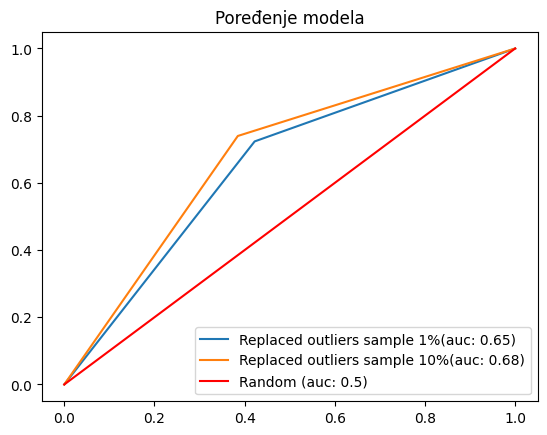

In [9]:
from sklearn.metrics import roc_curve, roc_auc_score
models = [knn_grid_replaced_sam,knn_replaced]
model_names = ['Replaced outliers sample 1%','Replaced outliers sample 10%']
for model, model_name,X_test in zip(models, model_names,[X_test_replaced_scaled,X_test_replaced_scaled]):
    y_pred = model.predict(X_test)
    fpr,tpr, _ = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    lab = model_name + "(auc: " + str(round(auc, 2)) + ")"
    plt.plot(fpr, tpr, label=lab)

plt.plot([0, 1], [0, 1], label='Random (auc: 0.5)', color='red')
plt.title("Poređenje modela")
plt.legend()
plt.show()

In [10]:
dump(models, 'knn.joblib')

['knn.joblib']